In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import date,timedelta
from datetime import date

In [3]:
df_cab = pd.read_csv('Cab_Data.csv')
df_city = pd.read_csv('City.csv')
df_cusid = pd.read_csv('Customer_ID.csv')
df_transid = pd.read_csv('Transaction_ID.csv')
df_holiday= pd.read_csv('Holiday.csv')

In [4]:
for i in range(359392):
    df_cab['Date of Travel'][i] = date(1900,1,1)+timedelta(int(df_cab['Date of Travel'][i])-2)
df_cab.head(5)

C:\Users\Ruizhe Zhang\AppData\Local\Temp\ipykernel_40688\4241785755.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cab['Date of Travel'][i] = date(1900,1,1)+timedelta(int(df_cab['Date of Travel'][i])-2)


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [5]:
df1 = df_cab.merge(df_transid, how='left', on='Transaction ID').merge(df_cusid, how='left', on='Customer ID').dropna()
df1['Revenue']=df1['Price Charged']-df1['Cost of Trip']
df1.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Revenue
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28,10813,57.315
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,27,9237,23.666
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,53,11242,27.568
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash,Male,23,23327,25.798
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card,Male,33,8536,16.844


In [6]:
df_tmp = df1[['City','KM Travelled','Price Charged','Revenue']].groupby(by='City').sum()
df_tmp
df_tmp['Number of Rides'] = df1.groupby(by='City').count()['Transaction ID']
df2 = df_city.merge(df_tmp,how='left',on='City').set_index('City').dropna()
df2['Avg Price'] = df2['Price Charged']/df2['KM Travelled']
df2

,Population,Users,KM Travelled,Price Charged,Revenue,Number of Rides,Avg Price
City,,,,,,,
NEW YORK NY,"8,405,837","302,149",2248809.74,56954061.67,2.796256e+07,99885.0,25.326314
CHICAGO IL,"1,955,130","164,468",1281704.39,19841318.52,3.387313e+06,56625.0,15.480417
LOS ANGELES CA,"1,595,037","144,132",1088735.65,17795624.41,4.411709e+06,48033.0,16.345221
MIAMI FL,"1,339,155","17,675",145418.17,2580135.20,7.583012e+05,6454.0,17.742867
SILICON VALLEY,"1,177,609","27,247",193712.97,3684102.15,1.316705e+06,8519.0,19.018356
ORANGE COUNTY,"1,030,185","12,994",88826.69,1554873.21,4.570019e+05,3982.0,17.504572
SAN DIEGO CA,"959,307","69,995",460503.69,7136380.59,1.587163e+06,20488.0,15.496902
PHOENIX AZ,"943,999","6,133",45825.08,756682.64,1.929409e+05,2064.0,16.512413
DALLAS TX,"942,908","22,157",157782.05,3142429.91,1.128733e+06,7017.0,19.916270


Hypothesis 1: 

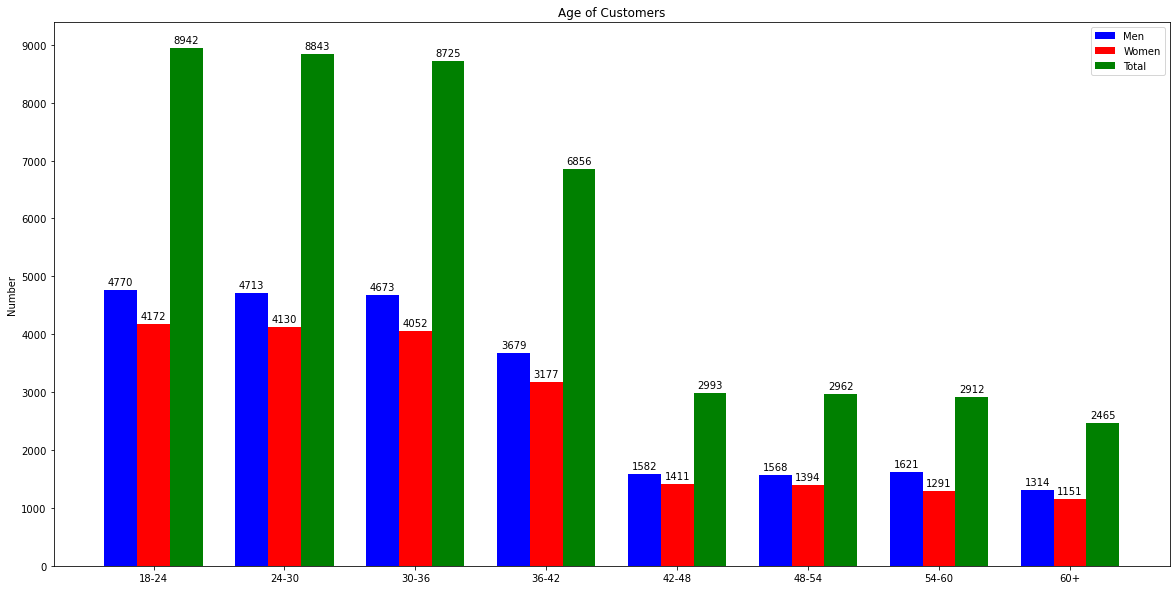

In [7]:
# age and # of customers
age_interval = ['18-24','24-30','30-36','36-42','42-48','48-54','54-60','60+']
a = df1[['Customer ID','Age','Gender']].drop_duplicates(subset='Customer ID')[['Age','Gender']]
age_m = a[a.Gender=='Male'].groupby(by=pd.cut(a[a.Gender=='Male']['Age'], np.arange(18, 67, 6))).count()['Age']
age_f = a[a.Gender=='Female'].groupby(by=pd.cut(a[a.Gender=='Female']['Age'], np.arange(18, 67, 6))).count()['Age']
age_t = age_m + age_f
x = np.arange(len(age_interval))
width = 0.25
fig1, ax1 = plt.subplots(figsize=(20,10))
rects1 = ax1.bar(x - width, age_m, width, label='Men', color='blue')
rects2 = ax1.bar(x, age_f, width, label='Women', color='red')
rects3 = ax1.bar(x + width, age_t, width, label='Total',color='green')
ax1.set_ylabel('Number')
ax1.set_title('Age of Customers')
ax1.set_xticks(x)
ax1.set_yticks(np.arange(0,9001,1000))
ax1.set_xticklabels(age_interval)
ax1.legend()
ax1.bar_label(rects1, padding=3)
ax1.bar_label(rects2, padding=3)
ax1.bar_label(rects3, padding=3)
plt.show()

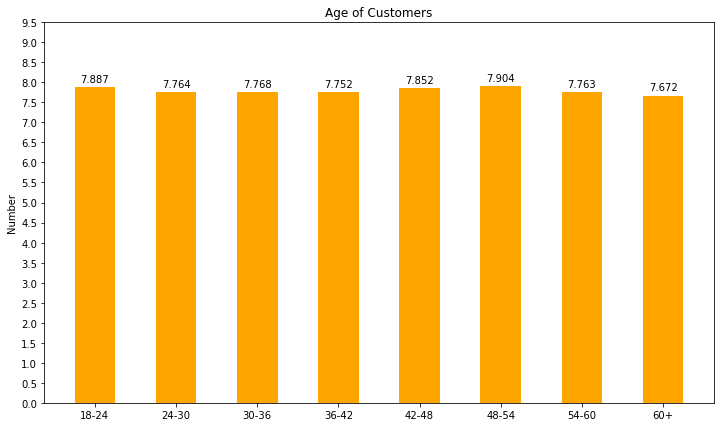

In [8]:
# age and avg times of taking the cab
df_ageavg = df1.groupby(by=pd.cut(df1['Age'], np.arange(18, 67, 6))).count()
df_ageavg["Average times"] = (df_ageavg["Age"]/age_t).round(3)
fig2, ax2 = plt.subplots(figsize=(12,7))
x = np.arange(len(age_interval))
rects4 = ax2.bar(x, df_ageavg["Average times"], width=0.5, label='Total',color="orange")
ax2.set_ylabel('Number')
ax2.set_title('Age of Customers')
ax2.set_xticks(x)
ax2.set_yticks(np.arange(0,10,0.5))
ax2.set_xticklabels(age_interval)
ax2.bar_label(rects4, padding=3)
plt.show()

In [9]:
# Correlation between times and age
b = df1[['Customer ID','Age']].drop_duplicates(subset='Customer ID').sort_values(by='Customer ID').reset_index().drop('index',axis=1)
b['Times'] = df1.groupby(by='Customer ID').count().reset_index()['Age']
b[['Age','Times']].corr()

,Age,Times
Age,1.000000,-0.001462
Times,-0.001462,1.000000
